# Evaluate your evaluation methods! A key to meaningful inference.

<div class="alert alert-block alert-danger">
<b>Alert:</b> If you're running this on <b>Google Colab</b>, then uncomment and run the next two cells.
</div>

In [ ]:
# !git clone https://github.com/Mark-Kramer/METER-Units.git

In [ ]:
# import sys
# sys.path.insert(0,'/content/METER-Units')

---
## 0 - Setup & Introduction

In [1]:
# Load modules
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
import plotly.graph_objects as go
from IPython.lib.display import YouTubeVideo
import ipywidgets as widgets
from IPython.display import display, clear_output
# Load custom functions
from inference_functions import *

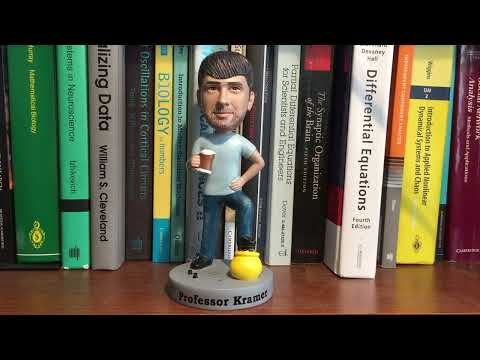

In [3]:
YouTubeVideo('Jj2wmI9byCM')

<div class="alert alert-block alert-info">

*Introduction*:

- If you’re starting this unit, you’re probably a scientist trying to make sense of complicated data.
- That’s exactly the goal of this unit: to teach you an approach to make inferences from noisy data.
- We’ll do so using data from a specific example, and to make an inference with a standard approach, we’ll build a model by fitting a line.
- We’ll then interpret the results, introduce a visual approach to test the goodness of fit of our model, and use it to improve our model and ultimately the inferences we make from the data.

</div>

---
## 1. The data: swim lessons versus drownings.

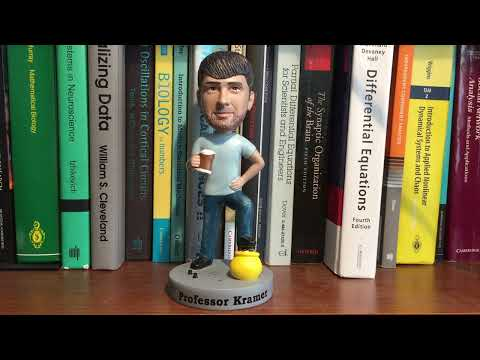

In [3]:
YouTubeVideo('AY9pBDo93dc')

You receive data from a community organization interested in understanding the impact of swimming lessons on swim safety. The data consist of the following information from in `N = 299` communities:

* `swim_lessons` - the number of swim lessons in a community,

* `drownings`   - the number of drownings (per 100,000 individuals) in a community,

* `xy` - the geographic location (latitude and longitude) of the community,

In [5]:
swim_lessons, drownings, xy = load_data()

We're interested in understanding the relationship (if any) between `swim_lessons` and `drownings`.

Let's start by plotting the data.

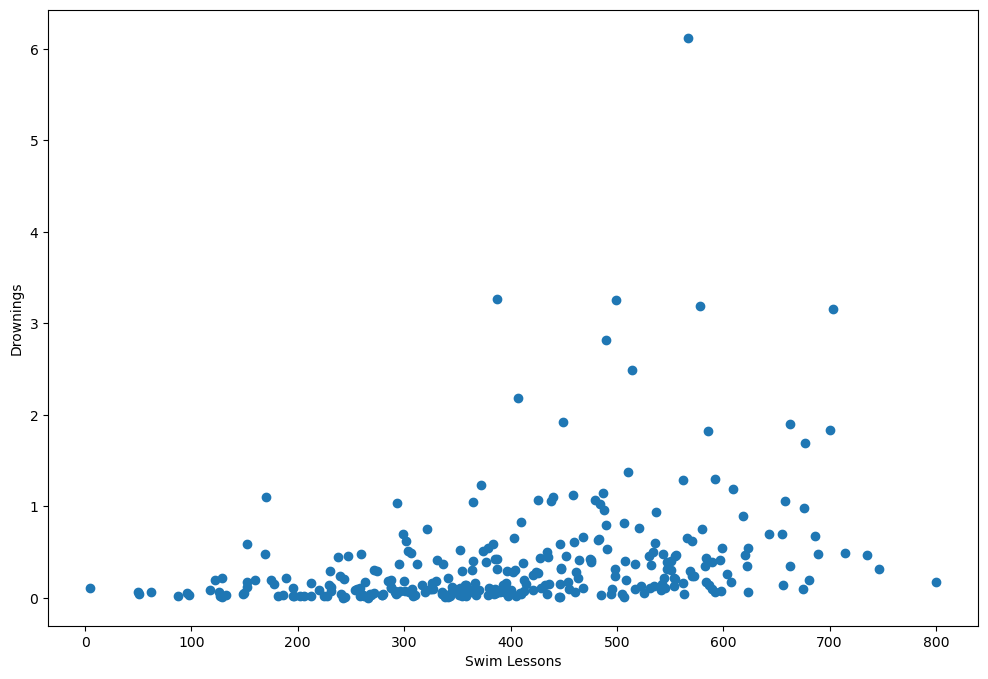

In [8]:
# Plot the data.
plt.figure(figsize=(12, 8))
plt.scatter(swim_lessons, drownings)
plt.xlabel('Swim Lessons')
plt.ylabel('Drownings');

<div class="alert alert-block alert-success">

**Q:** What do you observe?

**A:**

- *The drowning values are "squished" near 0, with fewer observations at larger values.*
- *At first glance, the number of drownings appears to increase with the number of swim lessons ... that's confusing.*

</div>

For reference (and maybe for future use ...) let's also plot the geographic location of each community.

In [ ]:
plot_spatial_coordinates(xy, 0)

<div class="alert alert-block alert-success">

**Q:** What do you observe?

**A:**

- *The communities vary in spatial location, with a high concentration at a point near the ocean.*
    
</div>

---
## 2. Make an inference: how do more swim lessons relate to drownings?

In [ ]:
YouTubeVideo('_2s_JpwqdKg')

Now, let's make an **inference** (i.e., draw a scientific conclusion) from these data.

In general, our goal is to infer from the noisy data a meaningful feature that's simpler than the data itself.

There are many ways to do so.

Here, we'd like to understand if there's a relationship between `swim_lessons` and `drownings`.

To do so, let's **fit a line** to the data.

The slope of the line provides an estimate of the relationship between the number of `drowings` and `swim_lessons`.

In [10]:
create_dropdown_estimate_regression(swim_lessons, drownings)

Dropdown(description='Options:', options=('I want to write all the code myself.', 'Show me the code and I will…

Output()

<div class="alert alert-block alert-success">

**Q:** Interpert the slope and p-value ... what do these two values tell us?

**A:** 

- *The p-value is **small**: we find a highly significant (p<<0.05) positive, relationship between swim lessons and drownings.*
- *The slope (effect size) is **small**: does that mean it's not important? We're fitting an equation for a line:*

`drownings = slope_estimate * swim_lessons`

or

`drownings = 0.00138 * swim_lessons`

*Now, consider what happens if the number of swim lessons increases by 1. Then, according to our fit model, the number of drownings increases by*

`drownings = 0.00138 * 1 = 0.00138`

*That's a small increase, in both the number of swim lessons and number of drownings.*

*Alternately, consider what happens if the number of swim lessons increases by 1000. Then, plugging into our model, we find the number of drownings increases by*

`drownings = 0.00138 * 1000 = 1.38`

*That's perhaps a more interpertable result; a community making a policy decision to promote more swim lessons (e.g., through subsidies) might expect 1 more drowning.*

*In this way, we can always interpert the results of a model. It's often useful to plug in values, and see what happens.*
</div>

---
Let's also **visualize** the estimated line by plotting it with the data.

In [ ]:
create_dropdown_plot_regression(swim_lessons, drownings)

<div class="alert alert-block alert-success">

**Q:** Again, interpert the results of your estimation ... what does this mean?

**A:**

- *Nothing looks terribly wrong ... there's a line with a confidence interval that seems to fit the data.*

</div>

<div class="alert alert-block alert-danger">

**Discussion:**

</p>

We've applied a standard analysis approach and found a (highly) significant result, certainly a result passable for peer-reviewed publication.

**Q:** So what's our next step?

**CENTER generated Button: I'm ready to publish!**
- *Discussion*: That's a reasonable conclusion, based on the evidence we've looked at so far. However, our conclusion is controversial: to reduce drownings, reduce the number of swim lessons. Before we pursue publication and recommend this policy, let's investigate one important aspect of our inference - how well our model (the line) fits the data. A good fit to the data inspires confidence in our inference. Alternatively, a poor fit provides us motivation to continue developing our model.

**CENTER generate Button: I'm not sure yet!**
- *Discussion*: I'm glad you're not sure. Neither am I. Our results suggest a controverisal conclusion: to reduce drownings, reduce the number of swim lessons. To make this conclusion, we fit a line to the data. But, is this line a good model of the data? If so, that inspires confidence in our result. However, if the model (a line) is not a good representation of the data, then we might question the result. Continue on to the next Mini to learn a strategey to answer this question.
</div>

---
## 3. Something’s not right … evaluate your evaluation method.

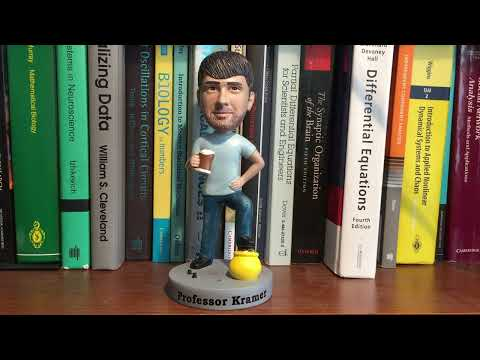

In [12]:
YouTubeVideo('ei83locyWZw')

To look for a relationship between `swim_lessons` and `drownings`, we chose a particular model of the relationship - we fit a line to the data. But, was this a good choice?

An important step in any analysis is to **check our model**.

To do so, let's look at the difference between the estimated drownings from the line and the actual values for `drownings`, i.e., let's look at the **residuals**.

If the
model is a good fit to the data, then we expect a patternless set of residuals (i.e., the residuals are "just noise" around our good model fit to the data).

Alternatively, if we find patterns in the residuals, we might wonder about our model choice, and consider strategies to improve our model.

To start let's plot the model errors (i.e., the residuals)...

In [ ]:
residuals = compute_residuals_2d(swim_lessons, drownings)
plt.figure(figsize=(12, 8))
plt.plot(residuals, '*')
plt.xlabel('Index')
plt.ylabel('Residuals');

<div class="alert alert-block alert-success">

**Q:** What do you see in the residuals ... do you see any patterns?

**A:**

- *At first glance, these residuals look mostly patternless ...*

</div>

<div class="alert alert-block alert-danger">

In the plot above, no systematic patterns are obvious; instead, the residuals appear to fluctuate around 0.

That means our model is all good, right?

NO! This visualization of the residuals is *not* very informative; the horizontal axis (the variable `index`) is arbitrary.

</div>

To observe systematic patterns in the residuals, let's plot the `residuals` versus the predictor in our model: the number of `swim_lessons`.

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(swim_lessons, residuals)
plt.xlabel('Number of swim lessons')
plt.ylabel('Model residuals');

<div class="alert alert-block alert-success">

**Q:** Now, do the residuals look patternless? What patterns do you see?

**A:**

*Our inspection of `residuals` versus `swim_lessons` reveals two clear patterns:*

- *as `swim_lessons` increases, a systematic decrease in the `residuals`,*
- *as `swim_lessons` increases, the variability of the `residuals` tends to increase.*

*We conclude from this **model check** that something isn't right ... our model doesn't adequately describe features in the data.*

</div>

<div class="alert alert-block alert-success">

**Q:** We've plotted the `residuals` versus the predictor `swim_lessons`, but we could also plot
    `residuals` versus the outcome variable `drownings`. Doing so, what do you see?

**A:**

</div>

So far, we've investigated how the `residuals` vary with the predictor `swim_lessons` or outcome `drownings`.

But, we have more information: we also have the geographic location (latitude and longitude) of each community in the study.

Let's investigate how the `residuals` relate to the geographic location of the community.

In [ ]:
plot_spatial_coordinates(xy, residuals.to_numpy())

<div class="alert alert-block alert-success">

**Q:** Do the residuals look patternless? Do you see any patterns in the residuals that depend on location?

**A:**

- *The residuals appear to vary with geographic location. Nearer to the ocean, the residuals tend to be more positive (darker blue colors).*
    
</div>

Our analysis of the residuals suggests an important result: **our model fit is no good**.

This is a very useful result.

Our initial inference from the data was very confusing: more swim lessons correlate (significantly!) with more drownings.

But this initial inference is based on a model - the line - that's no good.

Our next step is to improve the model, and thereby improve the inferences we make from the data.

---
## 4. Improve your scientific conclusions by improving your inference strategy.

In [ ]:
YouTubeVideo('XvIz0kPdZoE')

<div class="alert alert-block alert-danger">
Our results so far are not encouraging.

</p>

We're finding a significant, positive relationship between `swim_lessons` and `drownings`

(i.e., with *more* swim lessons there are *more* drownings).

How can this be?
</div>

By performing our **model check**, we found patterns in the model errors (i.e., in the `residuals`).

In particular, we noticed a spatial pattern in the residuals:
- positive residuals near the coast,
- negative resiudals away from the coast.

This pattern in the residuals suggests our model is missing an important factor.

<div class="alert alert-block alert-success">

**Q:** What is missing from the model?

**A:**

- *Many things could be missing, including the age of individuals in the community, the time of year in which the data were collected, issues with the sampling of data. The goal of a model is not to capture every possible cause. Instead, the goal of the model is to develop a simple, but useful, description of the model. In the words of [George Box](https://en.wikipedia.org/wiki/All_models_are_wrong): "All models are wrong, but some are useful."*
- *We showed in the previous Minis another peice of information: the geographic location of each community. How might this impact the number of drownings?*

</div>

The pattern in the residuls suggests we model `drownings` with two predictors

1. The number of swim lessons (`swim_lessons`), and
2. The distance from the ocean (`distance_from_ocean`).

To do so, let's fit a "2-dimensional line" (i.e., a plane) to the data.

In [ ]:
# Load the additional variable,
distance_from_ocean = load_more_data()

In [ ]:
create_dropdown_estimate_regression_3(swim_lessons, drownings, distance_from_ocean)

<div class="alert alert-block alert-success">

**Q:** Interpert the slope and p-value ... what do these 4 values tell us?

**A:**

- *We now have two results to interpret.*
- *First, we find a significant negative relationship between `drownings` and `distance_from_ocean`. In other words, the further from the ocean, the lower the number of drownings. That makes intuitive sense.*
- *Second, we find a weak (not significant) negative relationship between the `drownings` and the number of `swim_lessons`. While not significant, this negative relationship is consistent with our expectations: the more swim lessons, the fewer drownings.*

</div>

We can visualize our model, which is now the 2-dimensional plane:


In [ ]:
plot_regression_results_3d(swim_lessons, drownings, distance_from_ocean)

<div class="alert alert-block alert-success">

**Q:** Examine the model fit ... you'll probably need to rotate the plot. What do you see?

**A:**

- *The model fit is a 2-dimeonsional plane that slices through the data.*
- *The model fit is tilted so that, as the number of swim lessons or distance from ocean increaes, the number of drownings decreases.*
- *The model fit is not perfect. All of the points do not lie on the plane. But we never expect our model to be perfect. Instead, we're searching for a relatively simple model that's informative and a captures some aspects of the data.*

</div>

Let's **model check** the new model.

To do so, let's plot the new model errors (i.e., the `residuals`) versus a predictor in our model (here, the number of `swim_lessons`).

residuals = compute_residuals_3d(swim_lessons, drownings, distance_from_ocean)
plt.figure(figsize=(12, 8))
plt.scatter(swim_lessons, residuals)
plt.xlabel('Number of swim lessons')
plt.ylabel('Model residuals');

<div class="alert alert-block alert-success">

**Q:** Wait, I thought this was a 2-dimensional model. Why are the residuals only 1-dimensional?

**A:**

- *The residuals are the difference between the observed number of drownings (`drowning`) and the predicted number of drowning by the model. Both of these quantities are 1-dimensional. It's the input to the model (i.e., the number of model predictors) `swim_lessons` and `distance_from_ocean` that is 2-dimensional.*
    
</div>

<div class="alert alert-block alert-success">

**Q:** Do the residuals look less patterned (compared to our original line fit)? Do you still see any patterns?

**A:**

*In this new model, our inspection of `residuals` versus `swim_lessons` reveals*

- *as `swim_lessons` increases, *no* systematic trend in the `residuals`,*
- *as `swim_lessons` increases, the variability of the `residuals` tends to increase.*

*This is a nice improvement compared to our original model. Including the additional variable has reduced a systematic trend in the residuals*.    
</div>

Let's also plot the `residuals` of the new model versus the geographic location.

In [ ]:
plot_spatial_coordinates(xy, residuals.to_numpy())

<div class="alert alert-block alert-success">

**Q:** Do the residuals look patternless? Do you see any patterns in the residuals that depend on location?

**A:**

- *The residuals appear to vary less with geographic location. Notice we now observe positive residuals (darker blue colors) both near the ocean and far from the ocean. This is a good improvement compared to our original model.*
    
</div>

We've now made progress improving our model! Our initial model produced a significant - but nonsensical - result: as swim lessons increase, so do the number of drownings. Investigating this model residuals revealed a poor model fit. We improved our model by adding another predictor - the distance to the ocean. Doing so changed our results dramatically: we now find a (weak) relationship between increasing swim lessons and decreasing drownings. However, our evidence for this relationship is not convincing (the p-value is large). We'll show in other units that continued model refinement can further strengthen this result. If you're interetsed, check out the other Minis associated with this Unit.

To conclude, we made inferences from noisy data by buidling a model. But estimating the model and interperting the results is not enough! We must also check our model; we did so here by plotting the residuals. 